In [14]:
import os
import pywt
import csv
from scipy.io import loadmat
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, RNN, LSTM
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
import numpy as np
from focal_loss import SparseCategoricalFocalLoss
from keras import backend as K

In [15]:
maxi =0
count =0
co = 0
pathtrain = os.getcwd()+"/Dataset/training2017"
for file in os.listdir(pathtrain):
    myfile = file[6:]
    co+=1
    if(myfile == ".mat"):
        annots = loadmat(pathtrain+"/"+file)
        #print(annots['val'].shape)
        #print(type(annots['val']))
        check = annots['val'].shape    
        if ((len(annots['val'][0]))>maxi):
            maxi = len(annots['val'][0])
print(maxi)

18286


In [16]:
train_x = np
test_x = np
for file in os.listdir(pathtrain):
    myfile = file[6:]
    if(myfile == ".mat"):
        annots = loadmat(pathtrain+"/"+file)
        check = annots['val']
        processed = tf.keras.preprocessing.sequence.pad_sequences(check, maxlen = maxi, dtype = "int16", padding = "pre", value = 0)
        #print(count)
        if( count == 0):
            train_x = processed
        elif(count == 1000):
            test_x = processed
        elif(count >1000 and count <= 1100):
            test_x = np.vstack((test_x,processed))
        elif(count < 1000):
            train_x = np.vstack((train_x,processed))
        else:
            break
        count+=1
print(train_x.shape)
print(test_x.shape)

(1000, 18286)
(101, 18286)


In [49]:
train_y = np
test_y = np
count2 =0
arr = np.array(0,dtype='i2')
reference = pathtrain+"/REFERENCE.csv"
with open(reference) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if( count2 == 0):
            if(row[1] == 'N'):
                train_y = np.array([0],dtype='i2')
            elif(row[1] == 'A'):
                train_y = np.array([1],dtype='i2')
            elif(row[1] == 'O'):
                train_y = np.array([2],dtype='i2')
            else:
                train_y = np.array([3],dtype='i2')
        elif(count2 == 1000):
            if(row[1] == 'N'):
                test_y = np.array([0],dtype='i2')
            elif(row[1] == 'A'):
                test_y = np.array([1],dtype='i2')
            elif(row[1] == 'O'):
                test_y = np.array([2],dtype='i2')
            else:
                test_y = np.array([3],dtype='i2')
        elif(count2 > 1000 and count2 <= 1100):
            if(row[1] == 'N'):
                test_y = np.vstack((test_y, np.array([0],dtype='i2')))
            elif(row[1] == 'A'):
                test_y = np.vstack((test_y, np.array([1],dtype='i2')))
            elif(row[1] == 'O'):
                test_y = np.vstack((test_y, np.array([2],dtype='i2')))
            else:
                test_y = np.vstack((test_y, np.array([3],dtype='i2')))
        elif(count2 < 1000):
            if(row[1] == 'N'):
                train_y = np.vstack((train_y, np.array([0],dtype='i2')))
            elif(row[1] == 'A'):
                train_y = np.vstack((train_y, np.array([1],dtype='i2')))
            elif(row[1] == 'O'):
                train_y = np.vstack((train_y, np.array([2],dtype='i2')))
            else:
                train_y = np.vstack((train_y, np.array([3],dtype='i2')))
        else:
            break
        count2+=1
print(train_y.shape)
print(test_y.shape)

(1000, 1)
(101, 1)


In [18]:
import pywt
from skimage.restoration import denoise_wavelet
train_xx = train_x
coeffs = pywt.wavedec(train_xx,'db6',level=3,)
cA3, cD3, cD2, cD1 = coeffs
print(train_x.shape)
print(cD3.shape)
print(cD2.shape)
print(cD1.shape)

(1000, 18286)
(1000, 2295)
(1000, 4579)
(1000, 9148)


In [98]:
test_xx = test_x
test_coeffs = pywt.wavedec(test_xx,'db6',level=3,)
test_cA3, test_cD3, test_cD2, test_cD1 = test_coeffs
print(test_x.shape)
print(test_cD3.shape)
print(test_cD2.shape)
print(test_cD1.shape)

(101, 18286)
(101, 2295)
(101, 4579)
(101, 9148)


In [19]:
x_denoiselvl3 = denoise_wavelet(cD3, wavelet='db6', multichannel=False,wavelet_levels=3,method='VisuShrink',rescale_sigma=True,mode='soft',)
print(x_denoiselvl3.shape)

x_denoiselvl2 = denoise_wavelet(cD2, wavelet='db6', multichannel=False,wavelet_levels=3,method='VisuShrink',rescale_sigma=True,mode='soft',)
print(x_denoiselvl2.shape)

x_denoiselvl1 = denoise_wavelet(cD1, wavelet='db6', multichannel=False,wavelet_levels=3,method='VisuShrink',rescale_sigma=True,mode='soft',)
print(x_denoiselvl1.shape)

(1000, 2295)
(1000, 4579)
(1000, 9148)


In [99]:
test_x_denoiselvl3 = denoise_wavelet(test_cD3, wavelet='db6', multichannel=False,wavelet_levels=3,method='VisuShrink',rescale_sigma=True,mode='soft',)
print(test_x_denoiselvl3.shape)

test_x_denoiselvl2 = denoise_wavelet(test_cD2, wavelet='db6', multichannel=False,wavelet_levels=3,method='VisuShrink',rescale_sigma=True,mode='soft',)
print(test_x_denoiselvl2.shape)

test_x_denoiselvl1 = denoise_wavelet(test_cD1, wavelet='db6', multichannel=False,wavelet_levels=3,method='VisuShrink',rescale_sigma=True,mode='soft',)
print(test_x_denoiselvl1.shape)

(101, 2295)
(101, 4579)
(101, 9148)


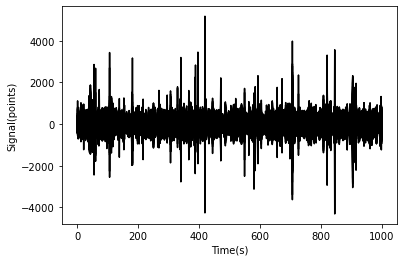

In [20]:
xvalues = []
newx = []
for i in range(1000):
    xvalues.append(i)
    newx.append(x_denoiselvl3[i])

plt.plot(xvalues,newx,color='k')
plt.xlabel('Time(s)')
plt.ylabel('Signal(points)')
plt.show()


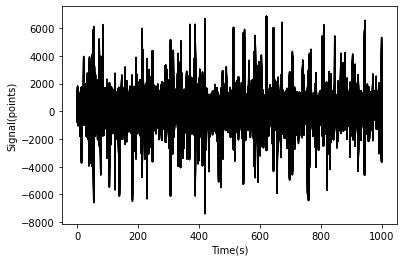

In [21]:
xvalues = []
newx = []
for i in range(1000):
    xvalues.append(i)
    newx.append(train_x[i])

plt.plot(xvalues,newx,color='k')
plt.xlabel('Time(s)')
plt.ylabel('Signal(points)')
plt.show()


In [22]:
train_level3=x_denoiselvl3.reshape(x_denoiselvl3.shape[0],x_denoiselvl3.shape[1],1)
print(train_level3.shape)

train_level2=x_denoiselvl2.reshape(x_denoiselvl2.shape[0],x_denoiselvl2.shape[1],1)
print(train_level2.shape)

train_level1=x_denoiselvl1.reshape(x_denoiselvl1.shape[0],x_denoiselvl1.shape[1],1)
print(train_level1.shape)

(1000, 2295, 1)
(1000, 4579, 1)
(1000, 9148, 1)


In [100]:
test_level3=test_x_denoiselvl3.reshape(test_x_denoiselvl3.shape[0],test_x_denoiselvl3.shape[1],1)
print(test_level3.shape)

test_level2=test_x_denoiselvl2.reshape(test_x_denoiselvl2.shape[0],test_x_denoiselvl2.shape[1],1)
print(test_level2.shape)

test_level1=test_x_denoiselvl1.reshape(test_x_denoiselvl1.shape[0],test_x_denoiselvl1.shape[1],1)
print(test_level1.shape)

(101, 2295, 1)
(101, 4579, 1)
(101, 9148, 1)


In [23]:
inputs = Input(shape=(2295,1))
lstm = LSTM(64, return_sequences=True, return_state=False, dropout=0.1)(inputs)
lstm2 =LSTM(32,return_sequences=False, return_state=False, dropout=0.1)(lstm)
flat = tf.keras.layers.Flatten()(lstm2)
dense1 = Dense(128, activation='tanh')(flat)
drop = tf.keras.layers.Dropout(0.2)(dense1)
output = Dense(4, activation='softmax')(drop)
model3 = Model(inputs, output)
model3.compile(loss=SparseCategoricalFocalLoss(gamma=2), optimizer='Nadam',  metrics=['accuracy'])
model3.fit(train_level3, train_y, epochs=350)

Epoch 1/350
32/32 [==============================] - 61s 2s/step - loss: 0.5500 - accuracy: 0.5450
Epoch 2/350
32/32 [==============================] - 68s 2s/step - loss: 0.4852 - accuracy: 0.5810
Epoch 3/350
32/32 [==============================] - 60s 2s/step - loss: 0.4851 - accuracy: 0.5860
Epoch 4/350
32/32 [==============================] - 60s 2s/step - loss: 0.4858 - accuracy: 0.5870
Epoch 5/350
32/32 [==============================] - 63s 2s/step - loss: 0.4870 - accuracy: 0.5880
Epoch 6/350
32/32 [==============================] - 62s 2s/step - loss: 0.4777 - accuracy: 0.5880
Epoch 7/350
32/32 [==============================] - 62s 2s/step - loss: 0.4805 - accuracy: 0.5900
Epoch 8/350
32/32 [==============================] - 61s 2s/step - loss: 0.4786 - accuracy: 0.5930
Epoch 9/350
32/32 [==============================] - 61s 2s/step - loss: 0.4793 - accuracy: 0.5810
Epoch 10/350
32/32 [==============================] - 61s 2s/step - loss: 0.4843 - accuracy: 0.5910
Epoch 11/

32/32 [==============================] - 71s 2s/step - loss: 0.2099 - accuracy: 0.7380
Epoch 84/350
32/32 [==============================] - 72s 2s/step - loss: 0.2169 - accuracy: 0.7200
Epoch 85/350
32/32 [==============================] - 63s 2s/step - loss: 0.2278 - accuracy: 0.7280
Epoch 86/350
32/32 [==============================] - 61s 2s/step - loss: 0.2093 - accuracy: 0.7330
Epoch 87/350
32/32 [==============================] - 63s 2s/step - loss: 0.2228 - accuracy: 0.7320
Epoch 88/350
32/32 [==============================] - 62s 2s/step - loss: 0.2185 - accuracy: 0.7250
Epoch 89/350
32/32 [==============================] - 64s 2s/step - loss: 0.2046 - accuracy: 0.7450
Epoch 90/350
32/32 [==============================] - 63s 2s/step - loss: 0.1860 - accuracy: 0.7460
Epoch 91/350
32/32 [==============================] - 62s 2s/step - loss: 0.2096 - accuracy: 0.7320
Epoch 92/350
32/32 [==============================] - 62s 2s/step - loss: 0.2089 - accuracy: 0.7430
Epoch 93/350


32/32 [==============================] - 63s 2s/step - loss: 0.0869 - accuracy: 0.8960
Epoch 165/350
32/32 [==============================] - 63s 2s/step - loss: 0.0917 - accuracy: 0.8840
Epoch 166/350
32/32 [==============================] - 63s 2s/step - loss: 0.1041 - accuracy: 0.8850
Epoch 167/350
32/32 [==============================] - 63s 2s/step - loss: 0.0949 - accuracy: 0.8920
Epoch 168/350
32/32 [==============================] - 63s 2s/step - loss: 0.0892 - accuracy: 0.8870
Epoch 169/350
32/32 [==============================] - 63s 2s/step - loss: 0.0823 - accuracy: 0.8880
Epoch 170/350
32/32 [==============================] - 64s 2s/step - loss: 0.0798 - accuracy: 0.8990
Epoch 171/350
32/32 [==============================] - 63s 2s/step - loss: 0.1001 - accuracy: 0.8830
Epoch 172/350
32/32 [==============================] - 63s 2s/step - loss: 0.1058 - accuracy: 0.8910
Epoch 173/350
32/32 [==============================] - 64s 2s/step - loss: 0.0992 - accuracy: 0.8840
Epoc

32/32 [==============================] - 63s 2s/step - loss: 0.0658 - accuracy: 0.9350
Epoch 246/350
32/32 [==============================] - 63s 2s/step - loss: 0.0653 - accuracy: 0.9290
Epoch 247/350
32/32 [==============================] - 63s 2s/step - loss: 0.0538 - accuracy: 0.9380
Epoch 248/350
32/32 [==============================] - 64s 2s/step - loss: 0.0600 - accuracy: 0.9320
Epoch 249/350
32/32 [==============================] - 63s 2s/step - loss: 0.0540 - accuracy: 0.9380
Epoch 250/350
32/32 [==============================] - 63s 2s/step - loss: 0.0485 - accuracy: 0.9460
Epoch 251/350
32/32 [==============================] - 65s 2s/step - loss: 0.0503 - accuracy: 0.9490
Epoch 252/350
32/32 [==============================] - 64s 2s/step - loss: 0.0534 - accuracy: 0.9470
Epoch 253/350
32/32 [==============================] - 63s 2s/step - loss: 0.0438 - accuracy: 0.9510
Epoch 254/350
32/32 [==============================] - 63s 2s/step - loss: 0.0555 - accuracy: 0.9430
Epoc

32/32 [==============================] - 63s 2s/step - loss: 0.0404 - accuracy: 0.9540
Epoch 327/350
32/32 [==============================] - 63s 2s/step - loss: 0.0457 - accuracy: 0.9540
Epoch 328/350
32/32 [==============================] - 63s 2s/step - loss: 0.0477 - accuracy: 0.9470
Epoch 329/350
32/32 [==============================] - 63s 2s/step - loss: 0.0431 - accuracy: 0.9570
Epoch 330/350
32/32 [==============================] - 62s 2s/step - loss: 0.0375 - accuracy: 0.9690
Epoch 331/350
32/32 [==============================] - 63s 2s/step - loss: 0.0441 - accuracy: 0.9570
Epoch 332/350
32/32 [==============================] - 64s 2s/step - loss: 0.0568 - accuracy: 0.9510
Epoch 333/350
32/32 [==============================] - 62s 2s/step - loss: 0.0254 - accuracy: 0.9660
Epoch 334/350
32/32 [==============================] - 62s 2s/step - loss: 0.0409 - accuracy: 0.9560
Epoch 335/350
32/32 [==============================] - 63s 2s/step - loss: 0.0348 - accuracy: 0.9580
Epoc

In [24]:
inputs = Input(shape=(4579,1))
lstm = LSTM(64, return_sequences=True, return_state=False, dropout=0.1)(inputs)
lstm2 =LSTM(32,return_sequences=False, return_state=False, dropout=0.1)(lstm)
flat = tf.keras.layers.Flatten()(lstm2)
dense1 = Dense(128, activation='tanh')(flat)
drop = tf.keras.layers.Dropout(0.2)(dense1)
output = Dense(4, activation='softmax')(drop)
model2 = Model(inputs, output)
model2.compile(loss=SparseCategoricalFocalLoss(gamma=2), optimizer='Nadam',  metrics=['accuracy'])
model2.fit(train_level2, train_y, epochs=350)

Epoch 1/350
32/32 [==============================] - 143s 4s/step - loss: 0.5502 - accuracy: 0.5700
Epoch 2/350
32/32 [==============================] - 160s 5s/step - loss: 0.4818 - accuracy: 0.5910
Epoch 3/350
32/32 [==============================] - 169s 5s/step - loss: 0.4821 - accuracy: 0.5860
Epoch 4/350
32/32 [==============================] - 170s 5s/step - loss: 0.4816 - accuracy: 0.5890
Epoch 5/350
32/32 [==============================] - 174s 5s/step - loss: 0.4746 - accuracy: 0.5900
Epoch 6/350
32/32 [==============================] - 169s 5s/step - loss: 0.4783 - accuracy: 0.5920
Epoch 7/350
32/32 [==============================] - 171s 5s/step - loss: 0.4797 - accuracy: 0.5930
Epoch 8/350
32/32 [==============================] - 171s 5s/step - loss: 0.4778 - accuracy: 0.5910
Epoch 9/350
32/32 [==============================] - 182s 6s/step - loss: 0.4763 - accuracy: 0.5930
Epoch 10/350
32/32 [==============================] - 184s 6s/step - loss: 0.4687 - accuracy: 0.5930

32/32 [==============================] - 192s 6s/step - loss: 0.2592 - accuracy: 0.6810
Epoch 83/350
32/32 [==============================] - 185s 6s/step - loss: 0.2724 - accuracy: 0.6770
Epoch 84/350
32/32 [==============================] - 185s 6s/step - loss: 0.3038 - accuracy: 0.6730
Epoch 85/350
32/32 [==============================] - 188s 6s/step - loss: 0.2591 - accuracy: 0.6780
Epoch 86/350
32/32 [==============================] - 204s 6s/step - loss: 0.2470 - accuracy: 0.7060
Epoch 87/350
32/32 [==============================] - 192s 6s/step - loss: 0.2638 - accuracy: 0.6970
Epoch 88/350
32/32 [==============================] - 200s 6s/step - loss: 0.2430 - accuracy: 0.6800
Epoch 89/350
32/32 [==============================] - 194s 6s/step - loss: 0.2430 - accuracy: 0.7040
Epoch 90/350
32/32 [==============================] - 191s 6s/step - loss: 0.2422 - accuracy: 0.7160
Epoch 91/350
32/32 [==============================] - 192s 6s/step - loss: 0.2616 - accuracy: 0.7030
Epo

32/32 [==============================] - 206s 6s/step - loss: 0.1174 - accuracy: 0.8620
Epoch 163/350
32/32 [==============================] - 211s 7s/step - loss: 0.1133 - accuracy: 0.8690
Epoch 164/350
32/32 [==============================] - 208s 7s/step - loss: 0.1176 - accuracy: 0.8650
Epoch 165/350
32/32 [==============================] - 186s 6s/step - loss: 0.0900 - accuracy: 0.8870
Epoch 166/350
32/32 [==============================] - 186s 6s/step - loss: 0.1011 - accuracy: 0.8850
Epoch 167/350
32/32 [==============================] - 185s 6s/step - loss: 0.0918 - accuracy: 0.8850
Epoch 168/350
32/32 [==============================] - 180s 6s/step - loss: 0.0817 - accuracy: 0.9030
Epoch 169/350
32/32 [==============================] - 179s 6s/step - loss: 0.1031 - accuracy: 0.8800
Epoch 170/350
32/32 [==============================] - 180s 6s/step - loss: 0.1135 - accuracy: 0.8540
Epoch 171/350
32/32 [==============================] - 179s 6s/step - loss: 0.0912 - accuracy: 0

32/32 [==============================] - 180s 6s/step - loss: 0.0449 - accuracy: 0.9500
Epoch 243/350
32/32 [==============================] - 188s 6s/step - loss: 0.0381 - accuracy: 0.9590
Epoch 244/350
32/32 [==============================] - 182s 6s/step - loss: 0.0445 - accuracy: 0.9560
Epoch 245/350
32/32 [==============================] - 181s 6s/step - loss: 0.0428 - accuracy: 0.9540
Epoch 246/350
32/32 [==============================] - 180s 6s/step - loss: 0.0429 - accuracy: 0.9550
Epoch 247/350
32/32 [==============================] - 180s 6s/step - loss: 0.0647 - accuracy: 0.9390
Epoch 248/350
32/32 [==============================] - 182s 6s/step - loss: 0.0453 - accuracy: 0.9530
Epoch 249/350
32/32 [==============================] - 182s 6s/step - loss: 0.0680 - accuracy: 0.9350
Epoch 250/350
32/32 [==============================] - 185s 6s/step - loss: 0.0374 - accuracy: 0.9470
Epoch 251/350
32/32 [==============================] - 183s 6s/step - loss: 0.0491 - accuracy: 0

32/32 [==============================] - 213s 7s/step - loss: 0.0360 - accuracy: 0.9670
Epoch 323/350
32/32 [==============================] - 209s 7s/step - loss: 0.0610 - accuracy: 0.9330
Epoch 324/350
32/32 [==============================] - 210s 7s/step - loss: 0.0321 - accuracy: 0.9610
Epoch 325/350
32/32 [==============================] - 207s 6s/step - loss: 0.0489 - accuracy: 0.9520
Epoch 326/350
32/32 [==============================] - 207s 6s/step - loss: 0.0870 - accuracy: 0.9200
Epoch 327/350
32/32 [==============================] - 220s 7s/step - loss: 0.0747 - accuracy: 0.9330
Epoch 328/350
32/32 [==============================] - 206s 6s/step - loss: 0.0306 - accuracy: 0.9640
Epoch 329/350
32/32 [==============================] - 209s 7s/step - loss: 0.0280 - accuracy: 0.9640
Epoch 330/350
32/32 [==============================] - 210s 7s/step - loss: 0.0373 - accuracy: 0.9690
Epoch 331/350
32/32 [==============================] - 209s 7s/step - loss: 0.0303 - accuracy: 0

In [25]:
inputs = Input(shape=(9148,1))
lstm = LSTM(64, return_sequences=True, return_state=False, dropout=0.1)(inputs)
lstm2 =LSTM(32,return_sequences=False, return_state=False, dropout=0.1)(lstm)
flat = tf.keras.layers.Flatten()(lstm2)
dense1 = Dense(128, activation='tanh')(flat)
drop = tf.keras.layers.Dropout(0.2)(dense1)
output = Dense(4, activation='softmax')(drop)
model1 = Model(inputs, output)
model1.compile(loss=SparseCategoricalFocalLoss(gamma=2), optimizer='Nadam',  metrics=['accuracy'])
model1.fit(train_level1, train_y, epochs=350)

Epoch 1/350
32/32 [==============================] - 595s 19s/step - loss: 0.5745 - accuracy: 0.5560
Epoch 2/350
32/32 [==============================] - 779s 24s/step - loss: 0.4891 - accuracy: 0.5890
Epoch 3/350
32/32 [==============================] - 846s 26s/step - loss: 0.4758 - accuracy: 0.5930
Epoch 4/350
32/32 [==============================] - 883s 28s/step - loss: 0.4802 - accuracy: 0.5970
Epoch 5/350
32/32 [==============================] - 883s 28s/step - loss: 0.4781 - accuracy: 0.5940
Epoch 6/350
32/32 [==============================] - 878s 27s/step - loss: 0.4742 - accuracy: 0.5950
Epoch 7/350
32/32 [==============================] - 907s 28s/step - loss: 0.4733 - accuracy: 0.5930
Epoch 8/350
32/32 [==============================] - 869s 27s/step - loss: 0.4754 - accuracy: 0.5940
Epoch 9/350
32/32 [==============================] - 887s 28s/step - loss: 0.4757 - accuracy: 0.5950
Epoch 10/350
32/32 [==============================] - 894s 28s/step - loss: 0.4742 - accura

32/32 [==============================] - 868s 27s/step - loss: 0.3789 - accuracy: 0.6260
Epoch 82/350
32/32 [==============================] - 871s 27s/step - loss: 0.3924 - accuracy: 0.6240
Epoch 83/350
32/32 [==============================] - 859s 27s/step - loss: 0.3756 - accuracy: 0.6320
Epoch 84/350
32/32 [==============================] - 935s 29s/step - loss: 0.3702 - accuracy: 0.6450
Epoch 85/350
32/32 [==============================] - 962s 30s/step - loss: 0.3701 - accuracy: 0.6490
Epoch 86/350
32/32 [==============================] - 1020s 32s/step - loss: 0.3709 - accuracy: 0.6400
Epoch 87/350
32/32 [==============================] - 952s 30s/step - loss: 0.3677 - accuracy: 0.6370
Epoch 88/350
32/32 [==============================] - 913s 29s/step - loss: 0.3730 - accuracy: 0.6320
Epoch 89/350
32/32 [==============================] - 892s 28s/step - loss: 0.3612 - accuracy: 0.6510
Epoch 90/350
32/32 [==============================] - 889s 28s/step - loss: 0.3447 - accuracy:

32/32 [==============================] - 1006s 31s/step - loss: 0.2107 - accuracy: 0.7630
Epoch 161/350
32/32 [==============================] - 1103s 34s/step - loss: 0.1904 - accuracy: 0.7780
Epoch 162/350
32/32 [==============================] - 944s 29s/step - loss: 0.1893 - accuracy: 0.7890
Epoch 163/350
32/32 [==============================] - 938s 29s/step - loss: 0.1700 - accuracy: 0.7780
Epoch 164/350
32/32 [==============================] - 936s 29s/step - loss: 0.1744 - accuracy: 0.7890
Epoch 165/350
32/32 [==============================] - 927s 29s/step - loss: 0.1833 - accuracy: 0.7840
Epoch 166/350
32/32 [==============================] - 934s 29s/step - loss: 0.1855 - accuracy: 0.7770
Epoch 167/350
32/32 [==============================] - 932s 29s/step - loss: 0.1674 - accuracy: 0.8010
Epoch 168/350
32/32 [==============================] - 944s 29s/step - loss: 0.1875 - accuracy: 0.7810
Epoch 169/350
32/32 [==============================] - 932s 29s/step - loss: 0.2029 -

32/32 [==============================] - 877s 27s/step - loss: 0.1128 - accuracy: 0.8930
Epoch 240/350
32/32 [==============================] - 870s 27s/step - loss: 0.1216 - accuracy: 0.8690
Epoch 241/350
32/32 [==============================] - 882s 28s/step - loss: 0.1071 - accuracy: 0.8860
Epoch 242/350
32/32 [==============================] - 878s 27s/step - loss: 0.0865 - accuracy: 0.8860
Epoch 243/350
32/32 [==============================] - 892s 28s/step - loss: 0.1160 - accuracy: 0.8700
Epoch 244/350
32/32 [==============================] - 888s 28s/step - loss: 0.1236 - accuracy: 0.8710
Epoch 245/350
32/32 [==============================] - 888s 28s/step - loss: 0.1400 - accuracy: 0.8560
Epoch 246/350
32/32 [==============================] - 887s 28s/step - loss: 0.1121 - accuracy: 0.8660
Epoch 247/350
32/32 [==============================] - 880s 28s/step - loss: 0.1125 - accuracy: 0.8850
Epoch 248/350
32/32 [==============================] - 885s 28s/step - loss: 0.1066 - a

32/32 [==============================] - 922s 29s/step - loss: 0.0931 - accuracy: 0.8950
Epoch 319/350
32/32 [==============================] - 921s 29s/step - loss: 0.0816 - accuracy: 0.9150
Epoch 320/350
32/32 [==============================] - 901s 28s/step - loss: 0.0897 - accuracy: 0.9090
Epoch 321/350
32/32 [==============================] - 928s 29s/step - loss: 0.0806 - accuracy: 0.9140
Epoch 322/350
32/32 [==============================] - 929s 29s/step - loss: 0.0833 - accuracy: 0.9040
Epoch 323/350
32/32 [==============================] - 920s 29s/step - loss: 0.0764 - accuracy: 0.9110
Epoch 324/350
32/32 [==============================] - 1194s 37s/step - loss: 0.0683 - accuracy: 0.9290
Epoch 325/350
32/32 [==============================] - 910s 28s/step - loss: 0.0745 - accuracy: 0.9240
Epoch 326/350
32/32 [==============================] - 912s 28s/step - loss: 0.0676 - accuracy: 0.9290
Epoch 327/350
32/32 [==============================] - 914s 29s/step - loss: 0.0621 - 

In [27]:
import keras
model3.save("wavelevel3")
model2.save("wavelevel2")
model1.save("wavelevel1")

INFO:tensorflow:Assets written to: wavelevel3\assets
INFO:tensorflow:Assets written to: wavelevel2\assets
INFO:tensorflow:Assets written to: wavelevel1\assets


In [28]:
history3 = model3.fit(train_level3, train_y, validation_split=0.33, epochs=10, batch_size=10, verbose=0)

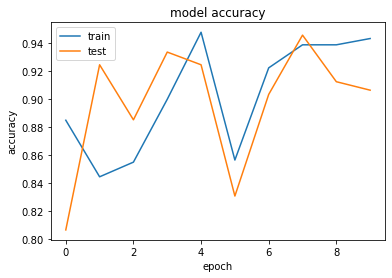

In [178]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

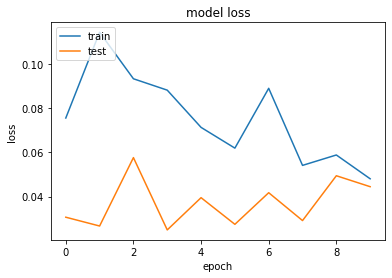

In [32]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
history2 = model2.fit(train_level2, train_y, validation_split=0.33, epochs=10, batch_size=10, verbose=0)

In [34]:
history1 = model1.fit(train_level1, train_y, validation_split=0.33, epochs=10, batch_size=10, verbose=0)

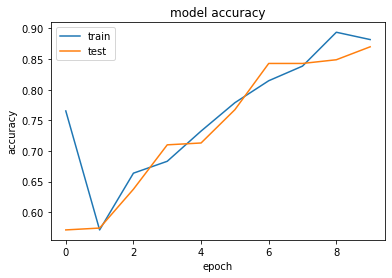

In [37]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
model1.evaluate(test_level1,test_y)

4/4 [==============================] - 7s 2s/step - loss: 0.4067 - accuracy: 0.7624


[0.4066675901412964, 0.7623762488365173]

In [105]:
model2.evaluate(test_level2,test_y)

4/4 [==============================] - 3s 835ms/step - loss: 0.5255 - accuracy: 0.7822


[0.5254537463188171, 0.7821782231330872]

In [106]:
model3.evaluate(test_level3,test_y)

4/4 [==============================] - 2s 428ms/step - loss: 1.0346 - accuracy: 0.6931


[1.0346388816833496, 0.6930692791938782]

In [107]:
results1 = model1.predict(test_level1)
results2 = model2.predict(test_level2)
results3 = model3.predict(test_level3)

In [113]:
print((results1[1][1]))

0.25295758


In [174]:
def Ensemble(res1,res2,res3):
    ensembleResults = np
    for i in range(len(res1)):
        temp = np
        for j in range(len(res1[i])):
            avg = (res1[i][j] + res2[i][j] + res3[i][j])/3
            #print(avg)
            if(j==0):
                temp = np.array([avg])
            else:
                temp = np.append(temp,avg)
        if (i==0):
            ensembleResults = temp
        else:
            ensembleResults = np.vstack((ensembleResults,temp))
    return ensembleResults

In [175]:
finalRes = Ensemble(results1, results2, results3)

In [138]:
def AccuracyOfEmnsamble(ensembleRes, original):
    correct =0
    for i in range(len(ensembleRes)):
        if(np.argmax(ensembleRes[i]) == original[i]):
            correct+=1
    return correct

In [176]:
acc = AccuracyOfEmnsamble(finalRes,test_y)

In [177]:
print(acc/101)

0.8217821782178217


In [146]:
def convectToSingle(finaleRes):
    answer = np
    for i in range(len(finaleRes)):
        temp = np
        temp = np.argmax(finaleRes[i])
        if(i == 0):
            answer = temp
        else:
            answer = np.vstack((answer,temp))
    return answer

In [151]:
from sklearn.metrics import classification_report
print(classification_report(test_y, convectToSingle(finalRes)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       1.00      0.36      0.53        14
           2       0.75      0.75      0.75        24
           3       1.00      0.80      0.89         5

    accuracy                           0.82       101
   macro avg       0.89      0.72      0.76       101
weighted avg       0.84      0.82      0.81       101



In [152]:
print(classification_report(test_y,convectToSingle(results1)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        58
           1       0.70      0.50      0.58        14
           2       0.64      0.67      0.65        24
           3       0.80      0.80      0.80         5

    accuracy                           0.76       101
   macro avg       0.74      0.71      0.72       101
weighted avg       0.76      0.76      0.76       101



In [153]:
print(classification_report(test_y,convectToSingle(results2)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        58
           1       1.00      0.64      0.78        14
           2       0.61      0.79      0.69        24
           3       1.00      0.40      0.57         5

    accuracy                           0.78       101
   macro avg       0.86      0.67      0.72       101
weighted avg       0.81      0.78      0.78       101



In [154]:
print(classification_report(test_y,convectToSingle(results3)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        58
           1       0.50      0.14      0.22        14
           2       0.57      0.67      0.62        24
           3       1.00      0.40      0.57         5

    accuracy                           0.69       101
   macro avg       0.70      0.52      0.55       101
weighted avg       0.68      0.69      0.66       101



In [179]:
model1.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 9148, 1)]         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 9148, 64)          16896     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                